# Bellabeat Project: Smart Device Usage Analysis

## Business Task
Analyze FitBit smart device data to identify usage trends and provide marketing recommedations for Bellabeat's Leaf tracker to enhance its market strategy

## Key Questions
* What are the most common usage patterns vary overtime?
* How do activily and sleep patters vary over time?
* Are there distinct user segements based on activity levels?

## Stakeholders
* Urška Sršen (Chief Creative Officer)
* Sando Mur (Cofounder)
* Bellabeat Marketing Analytics Team

## Explore the Dataset
#### Load and inspect data

In [7]:
import sys
print(sys.executable)

/Users/johnathanduran/Library/jupyterlab-desktop/jlab_server/bin/python


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Load datasets
daily_activity = pd.read_csv("dailyActivity_merged.csv")
sleep_data = pd.read_csv("sleepDay_merged.csv")

daily_activity.columns = daily_activity.columns.str.strip().str.replace(" ", "_")
sleep_data.columns = sleep_data.columns.str.strip().str.replace(" ", "_")

# Inspect data, first 10 rows of Daily Activity
daily_activity.head(10).style.set_caption("Daily Activity").format({"TotalSteps": "{:,.0f}", "Calories": "{:,.0f}"})

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,"13,162",8.500000,8.500000,0.000000,1.880000,0.550000,6.060000,0.000000,25,13,328,728,"1,985"
1,1503960366,4/13/2016,"10,735",6.970000,6.970000,0.000000,1.570000,0.690000,4.710000,0.000000,21,19,217,776,"1,797"
2,1503960366,4/14/2016,"10,460",6.740000,6.740000,0.000000,2.440000,0.400000,3.910000,0.000000,30,11,181,1218,"1,776"
3,1503960366,4/15/2016,"9,762",6.280000,6.280000,0.000000,2.140000,1.260000,2.830000,0.000000,29,34,209,726,"1,745"
4,1503960366,4/16/2016,"12,669",8.160000,8.160000,0.000000,2.710000,0.410000,5.040000,0.000000,36,10,221,773,"1,863"
5,1503960366,4/17/2016,"9,705",6.480000,6.480000,0.000000,3.190000,0.780000,2.510000,0.000000,38,20,164,539,"1,728"
6,1503960366,4/18/2016,"13,019",8.590000,8.590000,0.000000,3.250000,0.640000,4.710000,0.000000,42,16,233,1149,"1,921"
7,1503960366,4/19/2016,"15,506",9.880000,9.880000,0.000000,3.530000,1.320000,5.030000,0.000000,50,31,264,775,"2,035"
8,1503960366,4/20/2016,"10,544",6.680000,6.680000,0.000000,1.960000,0.480000,4.240000,0.000000,28,12,205,818,"1,786"
9,1503960366,4/21/2016,"9,819",6.340000,6.340000,0.000000,1.340000,0.350000,4.650000,0.000000,19,8,211,838,"1,775"


In [10]:
# Inspect data, first 10 rows of Sleep Data
sleep_data.head(10).style.set_caption("Sleep Data").format({"TotalTimeInBed": "{:,.0f} mins", "TotalMinutesAsleep": "{:.0f} mins"})

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327 mins,346 mins
1,1503960366,4/13/2016 12:00:00 AM,2,384 mins,407 mins
2,1503960366,4/15/2016 12:00:00 AM,1,412 mins,442 mins
3,1503960366,4/16/2016 12:00:00 AM,2,340 mins,367 mins
4,1503960366,4/17/2016 12:00:00 AM,1,700 mins,712 mins
5,1503960366,4/19/2016 12:00:00 AM,1,304 mins,320 mins
6,1503960366,4/20/2016 12:00:00 AM,1,360 mins,377 mins
7,1503960366,4/21/2016 12:00:00 AM,1,325 mins,364 mins
8,1503960366,4/23/2016 12:00:00 AM,1,361 mins,384 mins
9,1503960366,4/24/2016 12:00:00 AM,1,430 mins,449 mins


In [11]:
# Summary statistics 
daily_activity.describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574
std,2.424805e+09,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000
75%,6.962181e+09,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000


In [12]:
sleep_data.describe()

,Id,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
count,4.130000e+02,413.000000,413.000000,413.000000
mean,5.000979e+09,1.118644,419.467312,458.639225
std,2.060360e+09,0.345521,118.344679,127.101607
min,1.503960e+09,1.000000,58.000000,61.000000
25%,3.977334e+09,1.000000,361.000000,403.000000
50%,4.702922e+09,1.000000,433.000000,463.000000
75%,6.962181e+09,1.000000,490.000000,526.000000
max,8.792010e+09,3.000000,796.000000,961.000000


In [13]:
# Correct Data Types
daily_activity['ActivityDate'] = pd.to_datetime(daily_activity['ActivityDate'])

fmt = "%m/%d/%Y %I:%M:%S %p"
sleep_data['SleepDay'] = pd.to_datetime(
    sleep_data['SleepDay'],
    format=fmt,             # tell pandas exactly what to expect
    errors='coerce'         # turn any errors into NaT
)

In [14]:
# Check corrected Data Type
daily_activity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [15]:
sleep_data.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12,1,327,346
1,1503960366,2016-04-13,2,384,407
2,1503960366,2016-04-15,1,412,442
3,1503960366,2016-04-16,2,340,367
4,1503960366,2016-04-17,1,700,712


In [16]:
# Check for missing values
print("Daily Activity\n",daily_activity.isnull().sum(),"\n")
print("Sleep Activity\n", sleep_data.isnull().sum(),"\n")

Daily Activity
 Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64 

Sleep Activity
 Id                    0
SleepDay              0
TotalSleepRecords     0
TotalMinutesAsleep    0
TotalTimeInBed        0
dtype: int64 



In [17]:
# Check for duplicates
print(daily_activity.duplicated().sum())

0


In [18]:
# Merge datasets
merged_data = pd.merge(
    daily_activity,
    sleep_data,
    left_on=['Id', 'ActivityDate'],   # keys from daily_activity
    right_on=['Id', 'SleepDay'],      # keys from sleep_data
    how='left'                        # keep every activity record
)

merged_data.head(10)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,2016-04-12,1.0,327.0,346.0
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,2016-04-13,2.0,384.0,407.0
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,NaT,NaN,NaN,NaN
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,2016-04-15,1.0,412.0,442.0
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,2016-04-16,2.0,340.0,367.0
5,1503960366,2016-04-17,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,1728,2016-04-17,1.0,700.0,712.0
6,1503960366,2016-04-18,13019,8.59,8.59,0.0,3.25,0.64,4.71,0.0,42,16,233,1149,1921,NaT,NaN,NaN,NaN
7,1503960366,2016-04-19,15506,9.88,9.88,0.0,3.53,1.32,5.03,0.0,50,31,264,775,2035,2016-04-19,1.0,304.0,320.0
8,1503960366,2016-04-20,10544,6.68,6.68,0.0,1.96,0.48,4.24,0.0,28,12,205,818,1786,2016-04-20,1.0,360.0,377.0
9,1503960366,2016-04-21,9819,6.34,6.34,0.0,1.34,0.35,4.65,0.0,19,8,211,838,1775,2016-04-21,1.0,325.0,364.0


## Clean Data
#### Prepare the data for analysis by addressing inconsistencies

In [19]:
# Check for invalid values
merged_data.describe()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
count,9.430000e+02,943,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,413,413.000000,413.000000,413.000000
mean,4.858486e+09,2016-04-26 07:21:18.897136896,7652.188759,5.502853,5.488547,0.110045,1.504316,0.570880,3.349258,0.001601,21.239661,13.628844,193.025451,990.353128,2307.507953,2016-04-26 12:40:05.811137792,1.118644,419.467312,458.639225
min,1.503960e+09,2016-04-12 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2016-04-12 00:00:00,1.000000,58.000000,61.000000
25%,2.320127e+09,2016-04-19 00:00:00,3795.000000,2.620000,2.620000,0.000000,0.000000,0.000000,1.950000,0.000000,0.000000,0.000000,127.000000,729.000000,1829.500000,2016-04-19 00:00:00,1.000000,361.000000,403.000000
50%,4.445115e+09,2016-04-26 00:00:00,7439.000000,5.260000,5.260000,0.000000,0.220000,0.240000,3.380000,0.000000,4.000000,7.000000,199.000000,1057.000000,2140.000000,2016-04-27 00:00:00,1.000000,433.000000,463.000000
75%,6.962181e+09,2016-05-04 00:00:00,10734.000000,7.720000,7.715000,0.000000,2.065000,0.805000,4.790000,0.000000,32.000000,19.000000,264.000000,1229.000000,2796.500000,2016-05-04 00:00:00,1.000000,490.000000,526.000000
max,8.877689e+09,2016-05-12 00:00:00,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000,2016-05-12 00:00:00,3.000000,796.000000,961.000000
std,2.423712e+09,NaN,5086.532832,3.926509,3.909291,0.622292,2.657626,0.884775,2.046505,0.007335,32.946264,20.000746,109.308468,301.262473,720.815522,NaN,0.345521,118.344679,127.101607


In [20]:
merged_data.isnull().sum()

Id                            0
ActivityDate                  0
TotalSteps                    0
TotalDistance                 0
TrackerDistance               0
LoggedActivitiesDistance      0
VeryActiveDistance            0
ModeratelyActiveDistance      0
LightActiveDistance           0
SedentaryActiveDistance       0
VeryActiveMinutes             0
FairlyActiveMinutes           0
LightlyActiveMinutes          0
SedentaryMinutes              0
Calories                      0
SleepDay                    530
TotalSleepRecords           530
TotalMinutesAsleep          530
TotalTimeInBed              530
dtype: int64

In [21]:
# Rows with Sleep data
merged_data['has_sleep_data'] = merged_data['SleepDay'].notna().astype(int)

# Pivot Table
pivot = (merged_data.pivot_table(index='has_sleep_data',
                                 values=['Calories', 'TotalSteps'],
                                 aggfunc='mean').rename(index={0: 'no_sleep_data', 1:'with_sleep_data'}))

pivot

,Calories,TotalSteps
has_sleep_data,,
no_sleep_data,2237.324528,6959.477358
with_sleep_data,2397.573850,8541.140436


In [22]:
# Paired dataset
paired = pd.merge(daily_activity, sleep_data, left_on=['Id','ActivityDate'],
                                               right_on=['Id','SleepDay'],
                                               how='inner')
paired.shape

(413, 19)

#### Summary of Data

In [23]:
print("Summary statistics for steps, calories, and sleep:")
merged_data[['TotalSteps', 'Calories', 'TotalMinutesAsleep']].describe()

Summary statistics for steps, calories, and sleep:


,TotalSteps,Calories,TotalMinutesAsleep
count,943.000000,943.000000,413.000000
mean,7652.188759,2307.507953,419.467312
std,5086.532832,720.815522,118.344679
min,0.000000,0.000000,58.000000
25%,3795.000000,1829.500000,361.000000
50%,7439.000000,2140.000000,433.000000
75%,10734.000000,2796.500000,490.000000
max,36019.000000,4900.000000,796.000000


In [24]:
print("\nCorrelation between TotalSteps and Calories:")
merged_data[['TotalSteps', 'Calories']].corr()


Correlation between TotalSteps and Calories:


,TotalSteps,Calories
TotalSteps,1.000000,0.592949
Calories,0.592949,1.000000


In [25]:
# Activity Level based on steps
merged_data['ActivityLevel'] = pd.cut(merged_data['TotalSteps'],bins=[0, 5000, 10000, float('inf')],
                                     labels=['Low','Medium','High'])

#View by activity group
merged_data.groupby('ActivityLevel')[['TotalSteps', 'Calories', 'TotalMinutesAsleep']].mean()

/var/folders/gn/zqrppfx960dffbr631yq6pxm0000gn/T/ipykernel_2846/2894044359.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  merged_data.groupby('ActivityLevel')[['TotalSteps', 'Calories', 'TotalMinutesAsleep']].mean()


,TotalSteps,Calories,TotalMinutesAsleep
ActivityLevel,,,
Low,2853.252212,1857.827434,454.291667
Medium,7472.158209,2356.788060,422.466667
High,13337.724590,2750.793443,396.754491


In [26]:
# Activity Level without sleep data
merged_data.groupby(['ActivityLevel', 'has_sleep_data'])[['Calories', 'TotalMinutesAsleep']].mean()

/var/folders/gn/zqrppfx960dffbr631yq6pxm0000gn/T/ipykernel_2846/3308145988.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  merged_data.groupby(['ActivityLevel', 'has_sleep_data'])[['Calories', 'TotalMinutesAsleep']].mean()


Calories  TotalMinutesAsleep
ActivityLevel has_sleep_data                                 
Low           0               1853.453846                 NaN
              1               1863.750000          454.291667
Medium        0               2228.881081                 NaN
              1               2514.540000          422.466667
High          0               2934.021739                 NaN
              1               2599.383234          396.754491

Replace NaNs with 0 in sleep columns

In [27]:
# Define the sleep columns to fill
sleep_cols = ['TotalSleepRecords', 'TotalMinutesAsleep', 'TotalTimeInBed']

# Replace NaN with 0 in those columns
merged_data[sleep_cols] = merged_data[sleep_cols].fillna(0)

# Check
merged_data[sleep_cols].isna().sum()  # should all be 0 now

TotalSleepRecords     0
TotalMinutesAsleep    0
TotalTimeInBed        0
dtype: int64

Sleep duration on weekends?

In [28]:
sleep_data = merged_data[merged_data['TotalMinutesAsleep'] > 0].copy()

# Weekday column
sleep_data['DayOfWeek'] = sleep_data['ActivityDate'].dt.day_name()

# Average minutes asleep per day
avg_sleep_by_day = (sleep_data.groupby('DayOfWeek')['TotalMinutesAsleep'].mean()
    .reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']))

# Show in hours
avg_sleep_by_day / 60

DayOfWeek
Monday       6.980496
Tuesday      6.742308
Wednesday    7.244697
Thursday     6.706154
Friday       6.757018
Saturday     7.013506
Sunday       7.545758
Name: TotalMinutesAsleep, dtype: float64

# Visualization

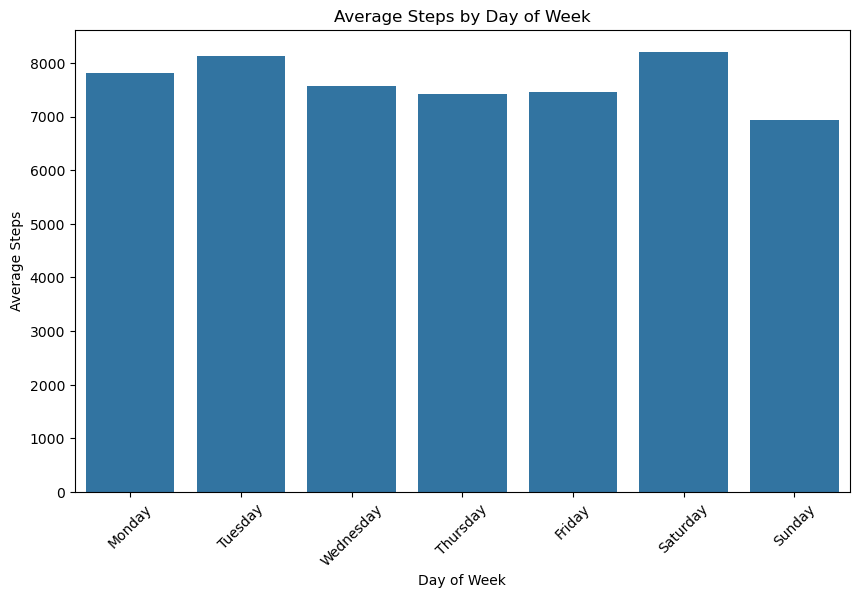

In [29]:
# Bar Chart of average steps by day
merged_data['DayOfWeek'] = merged_data['ActivityDate'].dt.day_name()
avg_steps_by_day = merged_data.groupby('DayOfWeek')['TotalSteps'].mean().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_steps_by_day.index, y=avg_steps_by_day.values)
plt.title('Average Steps by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Steps')
plt.xticks(rotation=45)
plt.show()

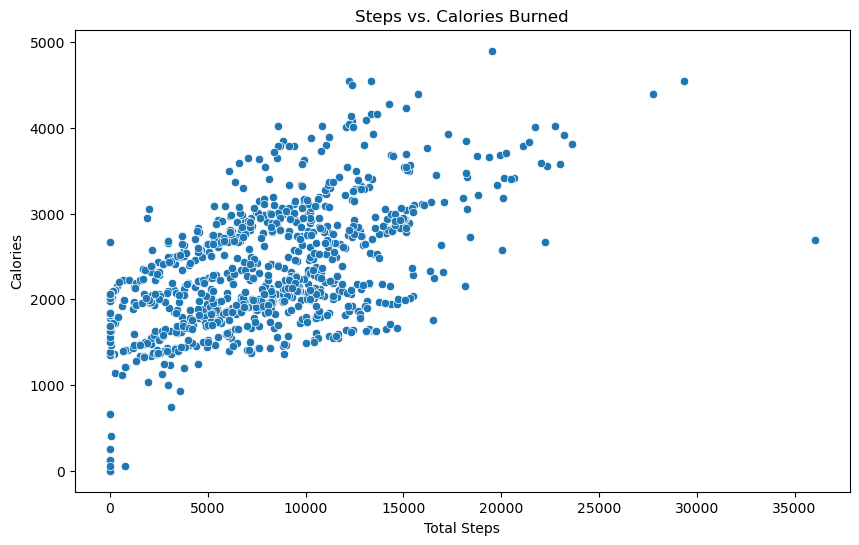

In [30]:
# Scatter plot: Steps vs. Calories
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TotalSteps', y='Calories', data=merged_data)
plt.title('Steps vs. Calories Burned')
plt.xlabel('Total Steps')
plt.ylabel('Calories')
plt.show()

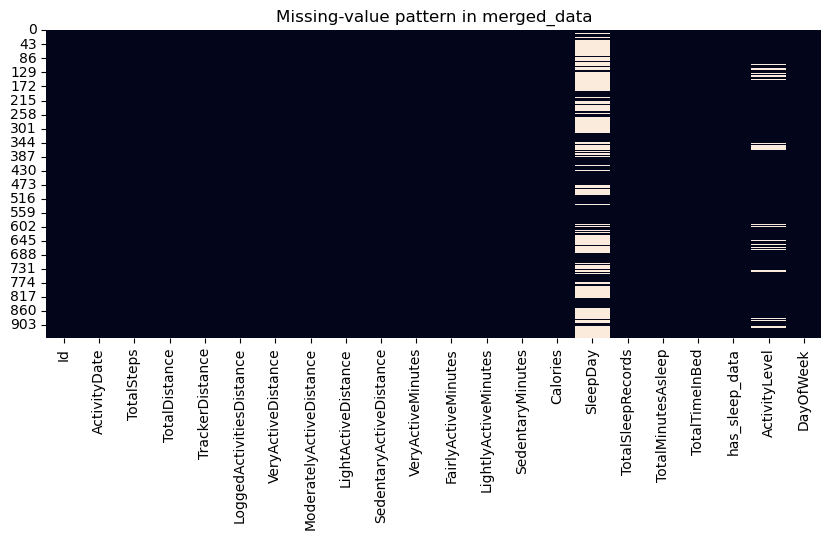

In [31]:
# 3. Missing-value heatmap
plt.figure(figsize=(10, 4))
sns.heatmap(merged_data.isnull(), cbar=False)
plt.title("Missing-value pattern in merged_data")
plt.show()

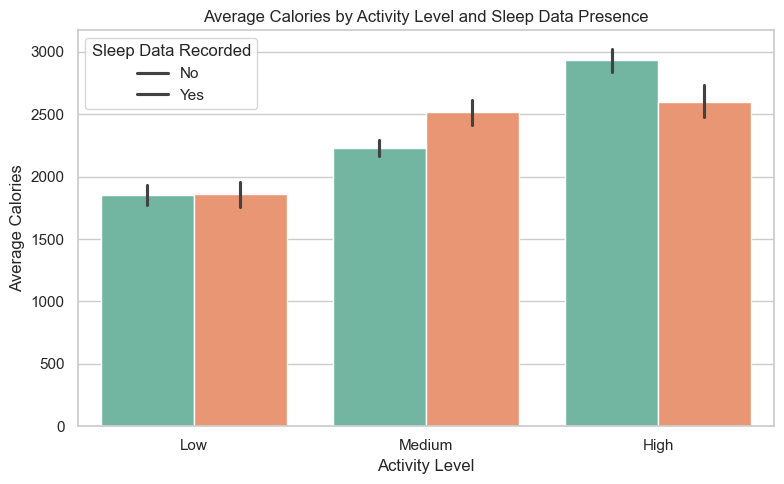

In [32]:
# Calories across groups
sns.set(style="whitegrid")

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(
    data=merged_data,
    x='ActivityLevel',
    y='Calories',
    hue='has_sleep_data',
    palette='Set2'
)

# Labels and title
plt.title("Average Calories by Activity Level and Sleep Data Presence")
plt.xlabel("Activity Level")
plt.ylabel("Average Calories")
plt.legend(title="Sleep Data Recorded", labels=["No", "Yes"])
plt.tight_layout()
plt.show()

Visualize the full distribution of sleep minutes including zeros

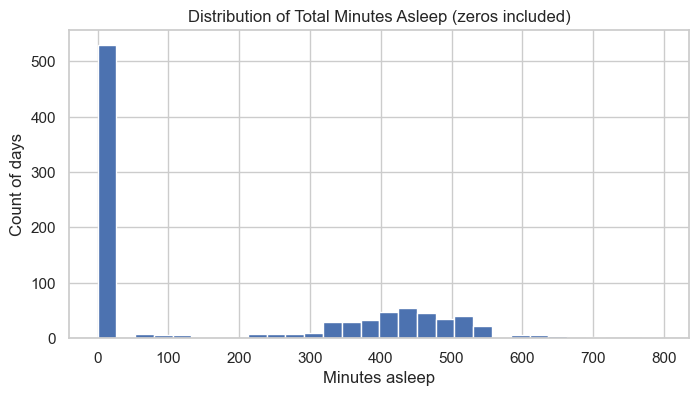

In [33]:
# Bar chart with zeros, shows the amount of missing data
plt.figure(figsize=(8,4))
merged_data['TotalMinutesAsleep'].hist(bins=30)
plt.title("Distribution of Total Minutes Asleep (zeros included)")
plt.xlabel("Minutes asleep")
plt.ylabel("Count of days")
plt.show()

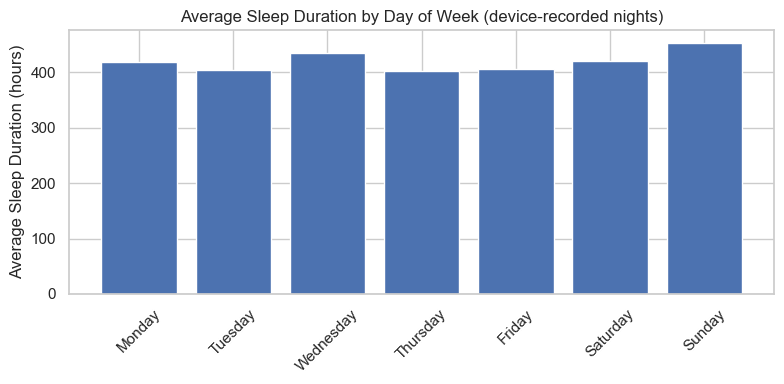

In [34]:
# Sleep by days of the week
plt.figure(figsize=(8,4))
plt.bar(avg_sleep_by_day.index, avg_sleep_by_day.values)
plt.ylabel("Average Sleep Duration (hours)")
plt.title("Average Sleep Duration by Day of Week (device-recorded nights)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Insights

#### Key Findings


* Users are most active on Tuesdays and Saturdays, averaging 8,000 steps
* There’s a moderate to strong correlation (0.59) between steps and calories burned
* Sleep duration averages 6 hours, with more sleep on weekends


## Application to Bellabeat Leaf Tracker

* Promote the activity tracking for weekday fitness challenges
* Highlight sleep tracking to encourage better weekday sleep habits

## Marketing Recommendations
1. Targeted Weekday Campaigns: Launch ads promoting the Leaf tracker for weekday fitness, as users average 8,000 steps on Tuesdays/Saturday
2. Sleep Improvement Features: Add sleep coaching tips to the Bellabeat app, addressing shorter weekday sleep (6.5 hours vs. 7 hours weekdays)
3. Partner with Fitness Apps: Collaborate with apps to integrate Leaf data, leveraging high activity correlations with calories burned.

## Conclusion
This analysis of FitBit data revealed key trends in user activity and sleep, applied to enhance Bellabeat’s Leaf tracker marketing. Weekday activity peaks and sleep patterns informed targeted campaigns and feature enhancements.